In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

https://www.kaggle.com/imdevskp/corona-virus-report#covid_19_clean_complete.csv

In [2]:
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='chesterish')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='notebook', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

Each row of the dataset contains the number of confirmed, Deaths and Recovered cases for each Providence/State for each day since 22/01/2010

In [3]:
data = pd.read_csv(r"C:\Users\loren\OneDrive\Documentos\CURSO PYTHON\MACHINE LEARNING\CORONAVIRUS\covid_19_clean_complete.csv")
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0


In [4]:
data.shape

(20619, 8)

In [5]:
data.rename(columns = {"Province/State" : "Province_State", 
                       "Country/Region": "Country_Region"}, inplace = True)
data.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [6]:
data.dtypes

Province_State     object
Country_Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths            float64
Recovered           int64
dtype: object

In [7]:
data.isna().sum()

Province_State    14299
Country_Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths               79
Recovered             0
dtype: int64

In [8]:
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,20619.000000,20619.000000,20619.000000,20540.000000,20619.000000
mean,21.456103,22.498687,1066.754789,51.936417,264.376158
std,24.785688,70.687999,10270.328185,611.949579,2890.696704
min,-51.796300,-135.000000,0.000000,0.000000,0.000000
25%,7.000000,-19.020800,0.000000,0.000000,0.000000
50%,23.685000,20.902977,1.000000,0.000000,0.000000
75%,41.204400,81.000000,76.000000,1.000000,3.000000
max,71.706900,178.065000,461437.000000,18279.000000,64187.000000


In [9]:
# Number of cases per date/day
data.groupby("Date")["Confirmed", "Deaths", "Recovered"].sum()

C:\Users\loren\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Confirmed,Deaths,Recovered
Date,,,
1/22/20,555,17.0,28
1/23/20,654,18.0,30
1/24/20,941,26.0,36
1/25/20,1434,42.0,39
1/26/20,2118,56.0,52
...,...,...,...
4/5/20,1272113,69373.0,256997
4/6/20,1345099,74564.0,273256
4/7/20,1426094,81864.0,296259


In [10]:
# sum() nos da el acumulativo, max() nos da los casos por día
data.groupby("Date")["Confirmed", "Deaths", "Recovered"].max()

C:\Users\loren\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17.0,28
1/23/20,444,17.0,28
1/24/20,549,24.0,31
1/25/20,761,40.0,32
1/26/20,1058,52.0,42
...,...,...,...
4/5/20,337072,15887.0,63945
4/6/20,366667,16523.0,64014
4/7/20,396223,17127.0,64073


In [11]:
data_per_day = data.groupby("Date")["Confirmed", "Deaths", "Recovered"].max()
data_per_day.head()

C:\Users\loren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17.0,28
1/23/20,444,17.0,28
1/24/20,549,24.0,31
1/25/20,761,40.0,32
1/26/20,1058,52.0,42


In [12]:
print(data_per_day.max())
print(data_per_day.min())
print("Día con más casos confirmados: ", data_per_day["Confirmed"].idxmax())
print("Día con más muertes: ",data_per_day["Deaths"].idxmax())
print("Día con más recuperados: ",data_per_day["Recovered"].idxmax())

Confirmed    461437.0
Deaths        18279.0
Recovered     64187.0
dtype: float64
Confirmed    444.0
Deaths        17.0
Recovered     28.0
dtype: float64
Día con más casos confirmados:  4/9/20
Día con más muertes:  4/9/20
Día con más recuperados:  4/9/20


In [13]:
# Number of cases per country and region descending order
data.groupby(["Province_State","Country_Region"])["Confirmed", "Deaths", "Recovered"].max().sort_values(by="Confirmed", ascending = False)

C:\Users\loren\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,,Confirmed,Deaths,Recovered
Province_State,Country_Region,,,
Hubei,China,67803,3215.0,64187
Quebec,Canada,10912,216.0,0
Ontario,Canada,5759,200.0,0
New South Wales,Australia,2773,21.0,4
Guangdong,China,1539,8.0,1423
...,...,...,...,...
British Virgin Islands,United Kingdom,3,0.0,0
Anguilla,United Kingdom,3,0.0,0
Tibet,China,1,0.0,1


In [14]:
data.groupby(["Country_Region"])["Confirmed", "Deaths", "Recovered"].max().sort_values(by="Confirmed", ascending = False)

C:\Users\loren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths,Recovered
Country_Region,,,
US,461437,16478.0,25410
Spain,153222,15447.0,52165
Italy,143626,18279.0,28470
Germany,118181,2607.0,52407
France,117749,12210.0,23206
...,...,...,...
Western Sahara,4,0.0,0
South Sudan,3,0.0,0
Burundi,3,0.0,0


In [15]:
data["Country_Region"].value_counts()

China             2607
Canada            1106
France             869
United Kingdom     869
Australia          632
                  ... 
South Korea         79
Serbia              79
Luxembourg          79
Maldives            79
Burundi             79
Name: Country_Region, Length: 184, dtype: int64

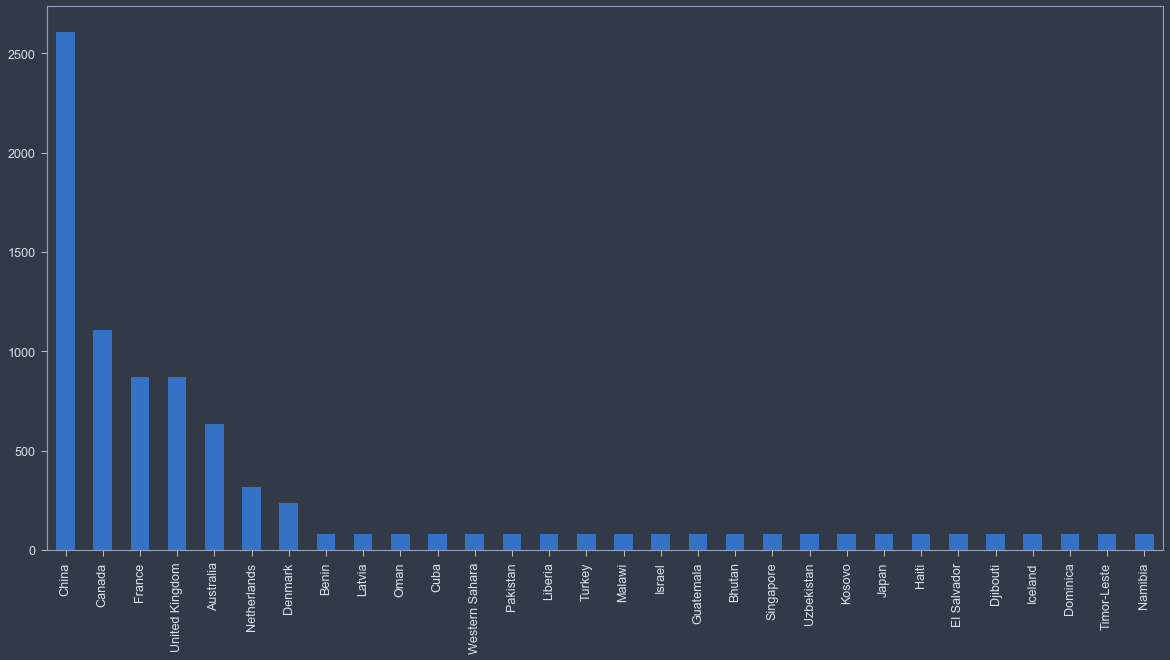

In [16]:
plt.figure(figsize=(20,10))
data["Country_Region"].value_counts().iloc[:30].plot(kind="bar")

In [17]:
data["Country_Region"].value_counts().iloc[:5]


China             2607
Canada            1106
France             869
United Kingdom     869
Australia          632
Name: Country_Region, dtype: int64

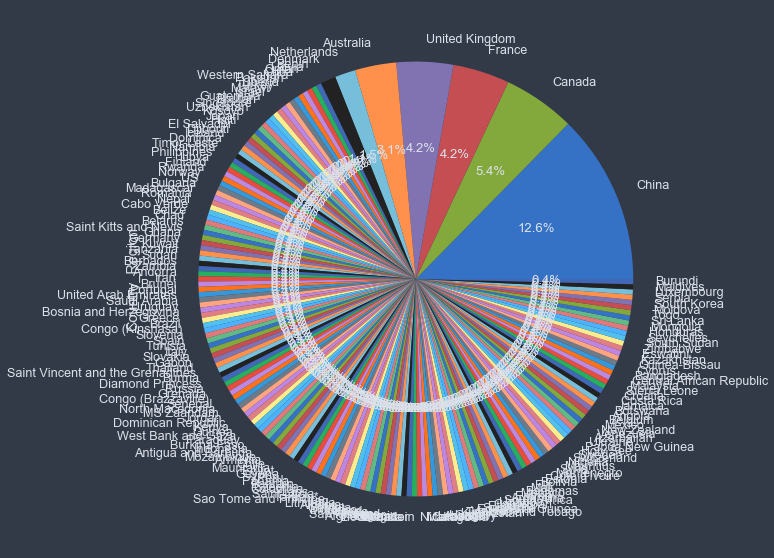

In [18]:
plt.figure(figsize=(20,10))
data["Country_Region"].value_counts().plot.pie(autopct = "%1.1f%%")

In [19]:
# How many countries have been affected
print(data["Country_Region"].unique())
print("Number of affected countries: ", len(data["Country_Region"].unique()))

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Diamond Princess' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'South Korea' 'Kuwait'
 'Kyrgyzstan' 'Latvia' 'Lebanon' 'Li

### Distribution on the Map


In [20]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes

In [21]:
# Convert data to GeoDataFrame
g_data01 = gpd.GeoDataFrame(data, geometry = gpd.points_from_xy(data["Long"], data["Lat"]))
g_data01.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0,POINT (65.00000 33.00000)
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0,POINT (20.16830 41.15330)
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0,POINT (1.65960 28.03390)
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0,POINT (1.52180 42.50630)
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0,POINT (17.87390 -11.20270)


In [22]:
# Another method to convert data to GeoDataFrame
points = [Point(x,y) for x,y in zip(data.Long, data.Lat)]
g_data02 = gpd.GeoDataFrame(data, geometry = points)
g_data02.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0,POINT (65.00000 33.00000)
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0,POINT (20.16830 41.15330)
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0,POINT (1.65960 28.03390)
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0,POINT (1.52180 42.50630)
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0,POINT (17.87390 -11.20270)


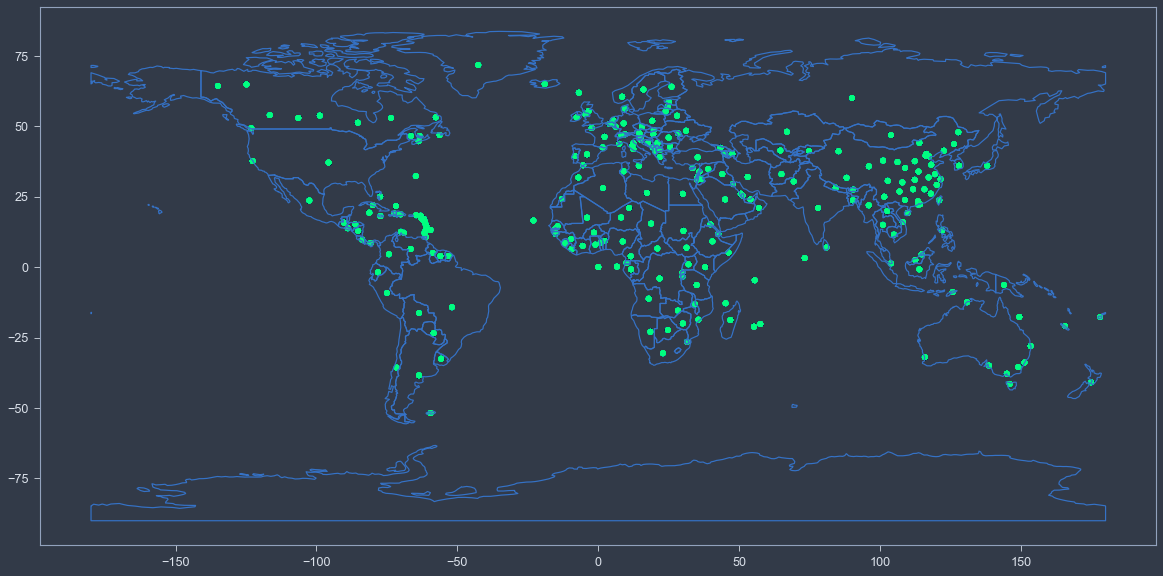

In [23]:
# Map Plot
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig,ax = plt.subplots(figsize = (20,10))
g_data01.plot(cmap="winter", ax = ax)
world.geometry.boundary.plot(ax=ax)

In [24]:
g_data01["Country_Region"].unique().tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

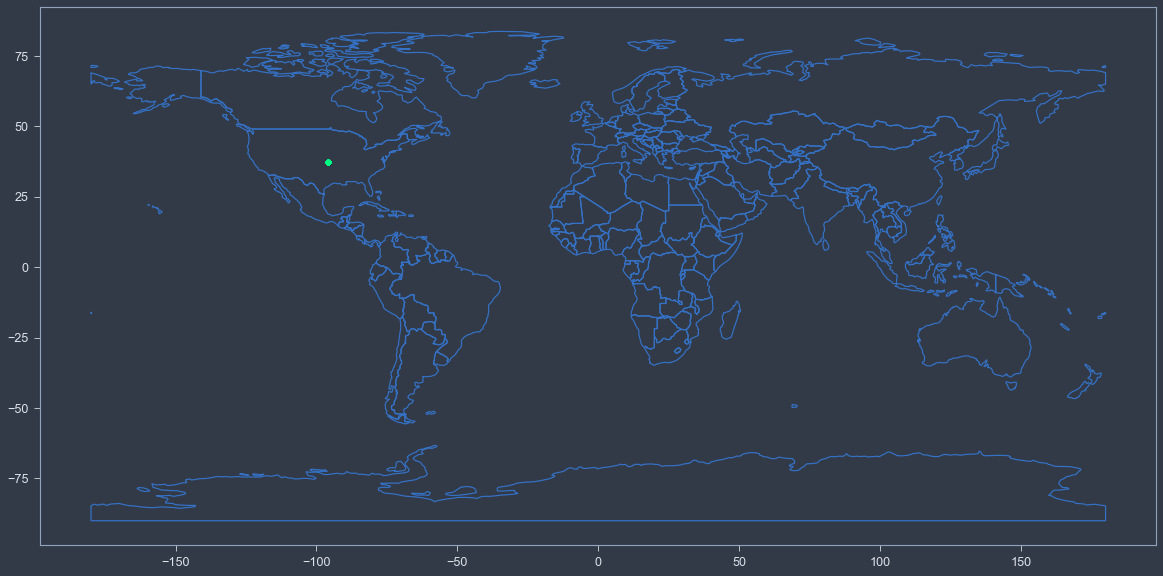

In [25]:
# Map Plot per country

fig,ax = plt.subplots(figsize = (20,10))
g_data01[g_data01["Country_Region"] == "US"].plot(cmap="winter", ax = ax)
world.geometry.boundary.plot(ax=ax)

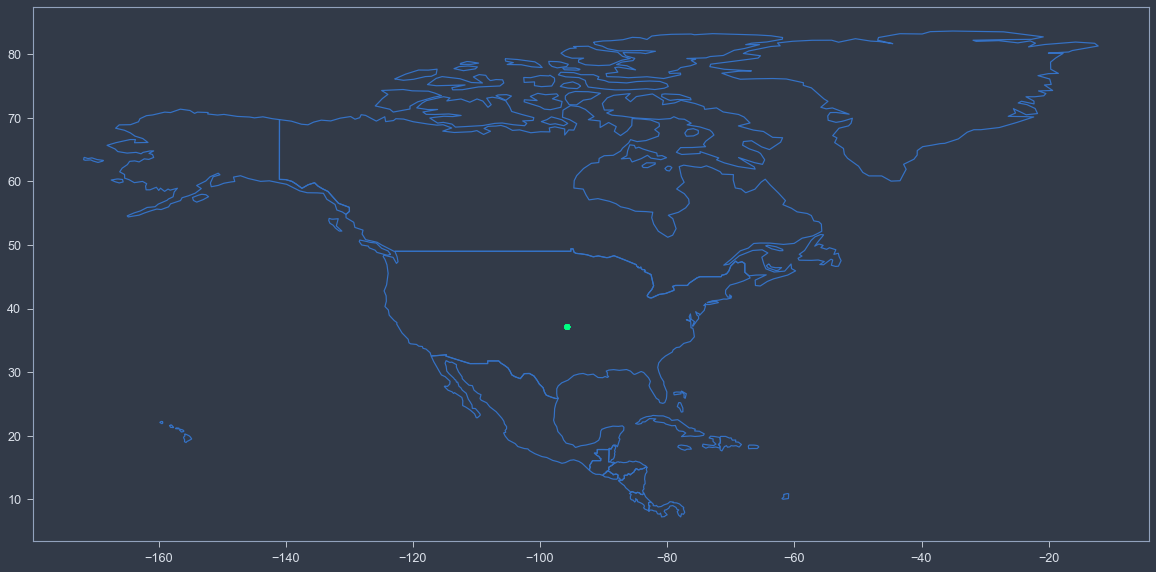

In [26]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
Asia = world[world["continent"] == "Asia"]
Oceania = world[world["continent"] == "Oceania"]
Africa = world[world["continent"] == "Africa"]
North_America = world[world["continent"] == "North America"]
South_America = world[world["continent"] == "South America"]
Europe = world[world["continent"] == "Europe"]
Seas = world[world["continent"] == "Seven seas"]
Antarctica = world[world["continent"] == "Antartica"]

fig,ax = plt.subplots(figsize = (20,10))
g_data01[g_data01["Country_Region"] == "US"].plot(cmap="winter", ax = ax)
North_America.geometry.boundary.plot(ax=ax)


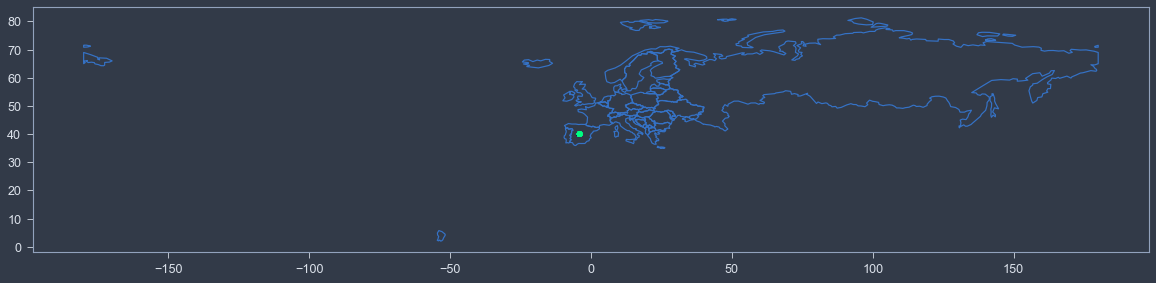

In [27]:
fig,ax = plt.subplots(figsize = (20,10))
g_data01[g_data01["Country_Region"] == "Spain"].plot(cmap="winter", ax = ax)
Europe.geometry.boundary.plot(ax=ax)

In [28]:
# Time Series Analysis

data2 = data
data.to_csv("coronavirus_data_clean.csv")

In [29]:
data["cases date"] = pd.to_datetime(data2["Date"])
data.dtypes

Province_State            object
Country_Region            object
Lat                      float64
Long                     float64
Date                      object
Confirmed                  int64
Deaths                   float64
Recovered                  int64
geometry                geometry
cases date        datetime64[ns]
dtype: object

In [30]:
timeseries = data2.set_index("cases date")
timeseries

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
cases date,,,,,,,,,
2020-01-22,NaN,Afghanistan,33.00000,65.000000,1/22/20,0,0.0,0,POINT (65.00000 33.00000)
2020-01-22,NaN,Albania,41.15330,20.168300,1/22/20,0,0.0,0,POINT (20.16830 41.15330)
2020-01-22,NaN,Algeria,28.03390,1.659600,1/22/20,0,0.0,0,POINT (1.65960 28.03390)
2020-01-22,NaN,Andorra,42.50630,1.521800,1/22/20,0,0.0,0,POINT (1.52180 42.50630)
2020-01-22,NaN,Angola,-11.20270,17.873900,1/22/20,0,0.0,0,POINT (17.87390 -11.20270)
...,...,...,...,...,...,...,...,...,...
2020-04-09,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,4/9/20,5,0.0,1,POINT (-59.52360 -51.79630)
2020-04-09,Saint Pierre and Miquelon,France,46.88520,-56.315900,4/9/20,1,0.0,0,POINT (-56.31590 46.88520)
2020-04-09,NaN,South Sudan,6.87700,31.307000,4/9/20,3,0.0,0,POINT (31.30700 6.87700)


In [31]:
# Cases per month
January = timeseries.loc["2020-01"][["Confirmed", "Recovered", "Deaths"]]
February = timeseries.loc["2020-02"][["Confirmed", "Recovered", "Deaths"]]
March = timeseries.loc["2020-03"][["Confirmed", "Recovered", "Deaths"]]
February

,Confirmed,Recovered,Deaths
cases date,,,
2020-02-01,0,0,0.0
2020-02-01,0,0,0.0
2020-02-01,0,0,0.0
2020-02-01,0,0,0.0
2020-02-01,0,0,0.0
...,...,...,...
2020-02-29,0,0,0.0
2020-02-29,0,0,0.0
2020-02-29,0,0,0.0


In [32]:
data_by_day = timeseries.groupby(["cases date"]).sum().reset_index(drop=None)
data_by_day

,cases date,Lat,Long,Confirmed,Deaths,Recovered
0,2020-01-22,5600.04289,5872.157373,555,17.0,28
1,2020-01-23,5600.04289,5872.157373,654,18.0,30
2,2020-01-24,5600.04289,5872.157373,941,26.0,36
3,2020-01-25,5600.04289,5872.157373,1434,42.0,39
4,2020-01-26,5600.04289,5872.157373,2118,56.0,52
...,...,...,...,...,...,...
74,2020-04-05,5600.04289,5872.157373,1272113,69373.0,256997
75,2020-04-06,5600.04289,5872.157373,1345099,74564.0,273256
76,2020-04-07,5600.04289,5872.157373,1426094,81864.0,296259
77,2020-04-08,5600.04289,5872.157373,1511102,88337.0,324502


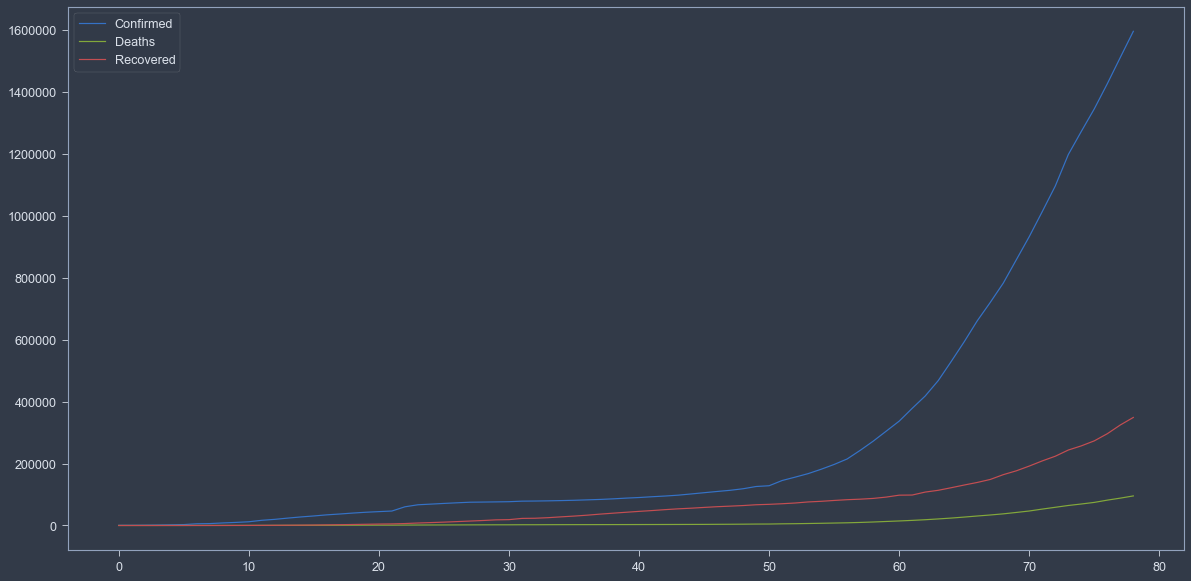

In [33]:
data_by_day[["Confirmed", "Deaths", "Recovered"]].plot(kind="line", figsize=(20,10))

In [39]:
data_by_country = data2.set_index(["Country_Region", "cases date"])
data_by_country2 = data_by_country.groupby(["Country_Region"])["Confirmed", "Deaths", "Recovered"].max().reset_index(drop=None)
data_by_country2.sort_values(by="Confirmed", ascending=False)

C:\Users\loren\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Country_Region,Confirmed,Deaths,Recovered
171,US,461437,16478.0,25410
156,Spain,153222,15447.0,52165
84,Italy,143626,18279.0,28470
65,Germany,118181,2607.0,52407
61,France,117749,12210.0,23206
...,...,...,...,...
181,Western Sahara,4,0.0,0
155,South Sudan,3,0.0,0
28,Burundi,3,0.0,0
129,Papua New Guinea,2,0.0,0


In [36]:
data_by_country3 = data_by_country.groupby(["Country_Region", "cases date"])["Confirmed", "Deaths", "Recovered"].max()
data_by_country3

C:\Users\loren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Confirmed  Deaths  Recovered
Country_Region cases date                              
Afghanistan    2020-01-22          0     0.0          0
               2020-01-23          0     0.0          0
               2020-01-24          0     0.0          0
               2020-01-25          0     0.0          0
               2020-01-26          0     0.0          0
...                              ...     ...        ...
Zimbabwe       2020-04-05          9     1.0          0
               2020-04-06         10     1.0          0
               2020-04-07         11     2.0          0
               2020-04-08         11     3.0          0
               2020-04-09         11     3.0          0

[14536 rows x 3 columns]

In [37]:
data_by_spain = data_by_country3.loc["Spain"]
data_by_china = data_by_country3.loc["China"]
data_by_italy = data_by_country3.loc["Italy"]
data_by_germany = data_by_country3.loc["Germany"]
data_by_us = data_by_country3.loc["US"]

Text(0.5, 1.0, 'Number of confirmed cases')

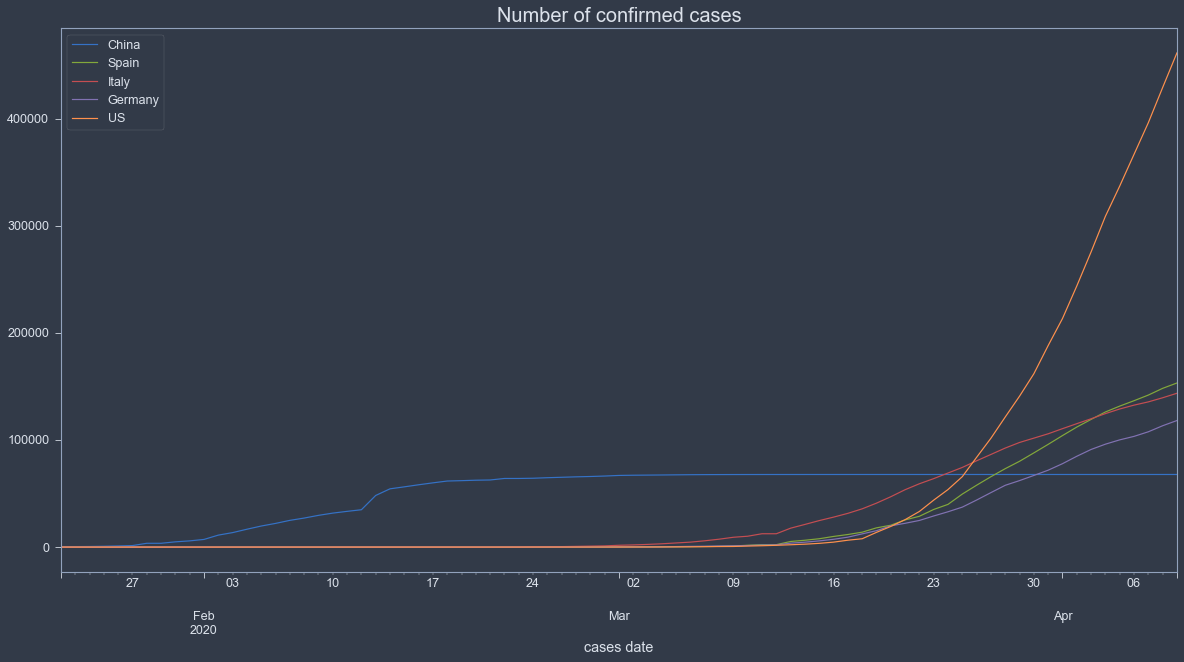

In [38]:
data_by_china["Confirmed"].plot(kind="line", figsize=(20,10), label="China")
data_by_spain["Confirmed"].plot(kind="line", figsize=(20,10), label="Spain")
data_by_italy["Confirmed"].plot(kind="line", figsize=(20,10), label="Italy")
data_by_germany["Confirmed"].plot(kind="line", figsize=(20,10), label="Germany")
data_by_us["Confirmed"].plot(kind="line", figsize=(20,10), label="US")
plt.legend(loc="upper left")
plt.title("Number of confirmed cases", fontsize=20)

Text(0.5, 1.0, 'Number of death cases')

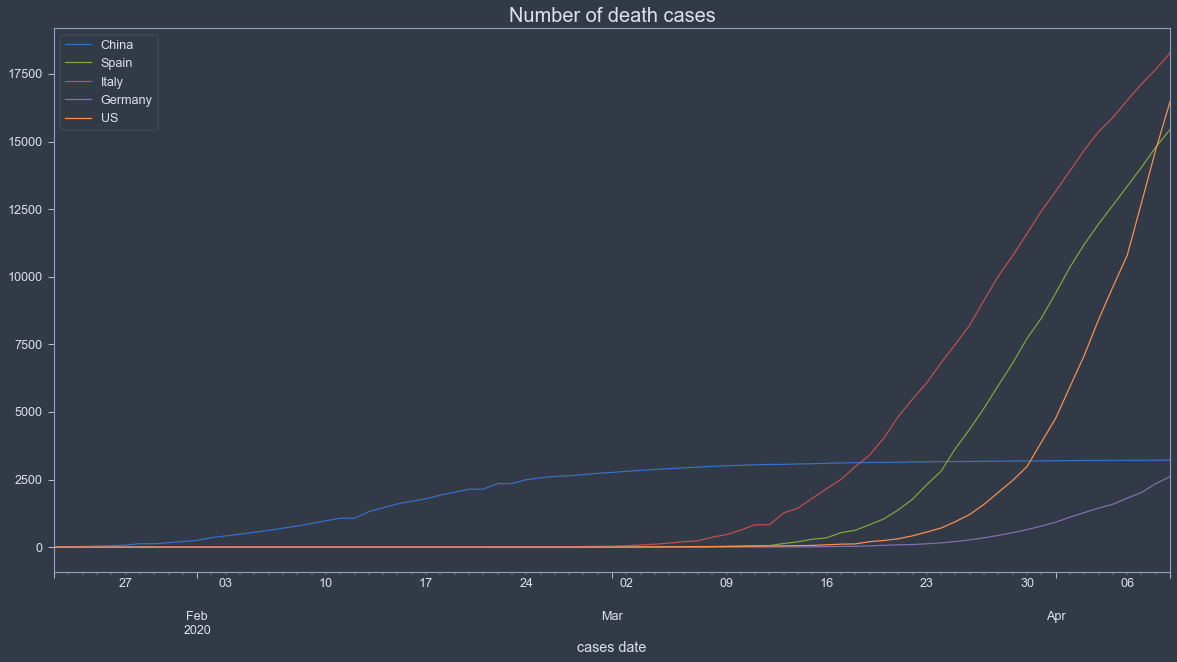

In [40]:
data_by_china["Deaths"].plot(kind="line", figsize=(20,10), label="China")
data_by_spain["Deaths"].plot(kind="line", figsize=(20,10), label="Spain")
data_by_italy["Deaths"].plot(kind="line", figsize=(20,10), label="Italy")
data_by_germany["Deaths"].plot(kind="line", figsize=(20,10), label="Germany")
data_by_us["Deaths"].plot(kind="line", figsize=(20,10), label="US")
plt.legend(loc="upper left")
plt.title("Number of death cases", fontsize=20)

## Prediction

### Linear Regression

In [41]:
data3 = data
data3['date_days'] = (data3["cases date"] - data3["cases date"].min())  / np.timedelta64(1,'D')
data4 = timeseries.groupby(["cases date"]).sum()
data4.index = (data4.index - data4.index.min()) / np.timedelta64(1,'D')
data4

,Lat,Long,Confirmed,Deaths,Recovered
cases date,,,,,
0.0,5600.04289,5872.157373,555,17.0,28
1.0,5600.04289,5872.157373,654,18.0,30
2.0,5600.04289,5872.157373,941,26.0,36
3.0,5600.04289,5872.157373,1434,42.0,39
4.0,5600.04289,5872.157373,2118,56.0,52
...,...,...,...,...,...
74.0,5600.04289,5872.157373,1272113,69373.0,256997
75.0,5600.04289,5872.157373,1345099,74564.0,273256
76.0,5600.04289,5872.157373,1426094,81864.0,296259


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = data4[["Deaths"]]
y = data4.index

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

model = LinearRegression()
kf = KFold(n_splits=5)
model.fit(X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=kf)
y_pred = model.predict(X_test)

print(y_pred)
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', model.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', model.intercept_)
print('Precisión del modelo sin CV:')
print(model.score(X_train, y_train))
print('Precisión del modelo con CV:')
print(scores.mean())
n = 20000
prediction = model.predict([[n]])
print("Día en el que se alcanzan %0.0f muertes: "%n , prediction)

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X_test, y_test, s=100)
plt.plot(X_test, y_pred, color="green", linewidth=2)
plt.title("Regresión lineal", fontsize = 20)
plt.show()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regtree = DecisionTreeRegressor(min_samples_split= 20, min_samples_leaf=10, random_state = 42)
regtree.fit(X_train, y_train)
y_pred2 = regtree.predict(X_test)
scores_rt = cross_val_score(regtree, X_train, y_train, cv=kf)
print(y_pred2)
print('Precisión del modelo sin CV:')
print(regtree.score(X_train, y_train))
print('Precisión del modelo con CV:')
print(scores_rt.mean())
n = 20000
prediction2 = regtree.predict([[n]])
print("Día en el que se alcanzan %0.0f muertes: "%n , prediction2)

In [ ]:
from graphviz import Source
import os
from sklearn.tree import export_graphviz

with open (r"C:\Users\loren\OneDrive\Documentos\CURSO PYTHON\MACHINE LEARNING\CORONAVIRUS\covid_rtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile)
    dotfile.close()
file = open("covid_rtree.dot", "r")
test = file.read()
Source(test)

### K-Nearest Neighboors

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

scaler = MinMaxScaler(feature_range=(0,1))

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

k_range = range(1,20)
score_plot=[]
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores = knn.score(X_test_scaled, y_test)
    score_plot.append(scores)
    print("Score para k = %f :" %k, scores)
plt.figure( figsize=(20,10))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.plot(k_range, score_plot)
plt.xticks([0, 5, 10, 15, 20])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

params = {"n_neighbors": (1,20)}
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
print("Valor más óptimo de k: ", model.best_params_)
n = 20000
predict = model.predict([[n]])
print("Día en el que se alcanzarán las %0.0f muertes: "%n, predict)

### Multiple prediction

### Multiple Linear Regression 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X1 = data4.iloc[:, 2:]
y1 = data4.index

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size = 0.7, random_state = 42)

model = LinearRegression()
kf = KFold(n_splits=5)
model.fit(X_train1, y_train1)

scores = cross_val_score(model, X_train1, y_train1, cv=kf)
y_pred = model.predict(X_test1)

print(y_pred)
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', model.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', model.intercept_)
print('Precisión del modelo sin CV:')
print(model.score(X_train1, y_train1))
print('Precisión del modelo con CV:')
print(scores.mean())
c = 275000
d = 13000
r = 90000
prediction_mult = model.predict([[c, 0.0, 0.0]])
print("Día en el que se alcanzan %0.0f casos confirmados, %0.0f muertes y %0.0f recuperados: "%(c,d,r) , prediction_mult)

### Multiple Decission Tree

In [ ]:
regtree = DecisionTreeRegressor(min_samples_split= 20, min_samples_leaf=10, random_state = 42)
regtree.fit(X_train1, y_train1)
y_pred2 = regtree.predict(X_test1)
scores_rt = cross_val_score(regtree, X_train1, y_train1, cv=kf)
print(y_pred2)
print('Precisión del modelo sin CV:')
print(regtree.score(X_train1, y_train1))
print('Precisión del modelo con CV:')
print(scores_rt.mean())
c = 275000
d = 13000
r = 90000
prediction_mult = regtree.predict([[c, 0.0, 0.0]])
print("Día en el que se alcanzan %0.0f casos confirmados, %0.0f muertes y %0.0f recuperados: "%(c,d,r) , prediction_mult)